In [1]:
import matplotlib.pyplot as plt
import numpy as np
from wrf import to_np, getvar, get_basemap, latlon_coords
from netCDF4 import Dataset
from metpy.plots import colortables
from matplotlib import path
import geopandas as gpd
import shapely
from matplotlib.patches import Polygon
#import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
import matplotlib.patches as patches
from descartes import PolygonPatch
from scipy.ndimage import gaussian_filter as gfilt

In [2]:
cmap = colortables.get_colortable('NWSReflectivity')

In [3]:
hour='21'
date='21'

import xarray as xr
wut = xr.open_dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_muregion_cool_2/wrfout_d01_2017-01-{date}_{hour}:00:00")
(wut["PH"]+wut["PHB"])[0,3,:,:]

<xarray.DataArray (south_north: 699, west_east: 749)>
array([[ 2023.8826,  2024.0327,  2024.1833, ...,  2009.3875,  2009.3643,
         2009.3591],
       [ 2023.9602,  2023.9899,  2024.0366, ...,  2008.9628,  2009.0771,
         2009.4794],
       [ 2024.0327,  2024.0156,  2023.9905, ...,  2008.8184,  2009.0177,
         2009.6079],
       ...,
       [18664.826 , 18640.209 , 18543.832 , ...,  1896.5032,  1896.7168,
         1896.4663],
       [18352.207 , 18349.52  , 18239.852 , ...,  1896.0178,  1896.2205,
         1896.0266],
       [18110.822 , 18117.002 , 18001.357 , ...,  1895.0507,  1895.3074,
         1895.5776]], dtype=float32)
Coordinates:
    XLAT     (south_north, west_east) float32 14.475815 14.479843 ... 39.783237
    XLONG    (south_north, west_east) float32 -100.89896 ... -69.41501
    XTIME    datetime64[ns] 2017-01-21T21:00:00
Dimensions without coordinates: south_north, west_east

In [4]:


file_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_ens_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile_wrf_d02 = Dataset(file_wrf_d02)

while True:
    dbz_wrf_d02 = np.array([0])
    if len(dbz_wrf_d02) == 1:
        try: 
            dbz_wrf_d02 = getvar(ncfile_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz_wrf_d02) != 1:
        print('WRF File Opened...')
        break


file1_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_muregion_cool_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile1_wrf_d02 = Dataset(file1_wrf_d02)

while True:
    dbz1_wrf_d02 = np.array([0])
    if len(dbz1_wrf_d02) == 1:
        try: 
            dbz1_wrf_d02 = getvar(ncfile1_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz1_wrf_d02) != 1:
        print('WRF File1 Opened...')
        break


file2_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_muregion_cool_1/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile2_wrf_d02 = Dataset(file2_wrf_d02)

while True:
    dbz2_wrf_d02 = np.array([0])
    if len(dbz2_wrf_d02) == 1:
        try: 
            dbz2_wrf_d02 = getvar(ncfile2_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz2_wrf_d02) != 1:
        print('WRF File2 Opened...')
        break
    
    
file3_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_muregion_warm_1/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile3_wrf_d02 = Dataset(file3_wrf_d02)

while True:
    dbz3_wrf_d02 = np.array([0])
    if len(dbz3_wrf_d02) == 1:
        try: 
            dbz3_wrf_d02 = getvar(ncfile3_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz3_wrf_d02) != 1:
        print('WRF File3 Opened...')
        break

    
file4_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_muregion_warm_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile4_wrf_d02 = Dataset(file4_wrf_d02)

while True:
    dbz4_wrf_d02 = np.array([0])
    if len(dbz4_wrf_d02) == 1:
        try: 
            dbz4_wrf_d02 = getvar(ncfile4_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz4_wrf_d02) != 1:
        print('WRF File4 Opened...')
        break
    
    
file5_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gomplume_cool_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile5_wrf_d02 = Dataset(file5_wrf_d02)

while True:
    dbz5_wrf_d02 = np.array([0])
    if len(dbz5_wrf_d02) == 1:
        try: 
            dbz5_wrf_d02 = getvar(ncfile5_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz5_wrf_d02) != 1:
        print('WRF File5 Opened...')
        break
    
    
file6_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gomplume_cool_1/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile6_wrf_d02 = Dataset(file6_wrf_d02)

while True:
    dbz6_wrf_d02 = np.array([0])
    if len(dbz6_wrf_d02) == 1:
        try: 
            dbz6_wrf_d02 = getvar(ncfile6_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz6_wrf_d02) != 1:
        print('WRF File6 Opened...')
        break

    
file7_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gomplume_warm_1/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile7_wrf_d02 = Dataset(file7_wrf_d02)

while True:
    dbz7_wrf_d02 = np.array([0])
    if len(dbz7_wrf_d02) == 1:
        try: 
            dbz7_wrf_d02 = getvar(ncfile7_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz7_wrf_d02) != 1:
        print('WRF File7 Opened...')
        break
    

file8_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gomplume_warm_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile8_wrf_d02 = Dataset(file8_wrf_d02)

while True:
    dbz8_wrf_d02 = np.array([0])
    if len(dbz8_wrf_d02) == 1:
        try: 
            dbz8_wrf_d02 = getvar(ncfile8_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz8_wrf_d02) != 1:
        print('WRF File8 Opened...')
        break
    

file9_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gombasin_cool_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile9_wrf_d02 = Dataset(file9_wrf_d02)

while True:
    dbz9_wrf_d02 = np.array([0])
    if len(dbz9_wrf_d02) == 1:
        try: 
            dbz9_wrf_d02 = getvar(ncfile9_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz9_wrf_d02) != 1:
        print('WRF File9 Opened...')
        break
        
        
file10_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gombasin_cool_1/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile10_wrf_d02 = Dataset(file10_wrf_d02)

while True:
    dbz10_wrf_d02 = np.array([0])
    if len(dbz10_wrf_d02) == 1:
        try: 
            dbz10_wrf_d02 = getvar(ncfile10_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz10_wrf_d02) != 1:
        print('WRF File10 Opened...')
        break
        
        
file11_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gombasin_warm_1/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile11_wrf_d02 = Dataset(file11_wrf_d02)

while True:
    dbz11_wrf_d02 = np.array([0])
    if len(dbz11_wrf_d02) == 1:
        try: 
            dbz11_wrf_d02 = getvar(ncfile11_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz11_wrf_d02) != 1:
        print('WRF File11 Opened...')
        break
        
        
file12_wrf_d02 = f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gombasin_warm_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

ncfile12_wrf_d02 = Dataset(file12_wrf_d02)

while True:
    dbz12_wrf_d02 = np.array([0])
    if len(dbz12_wrf_d02) == 1:
        try: 
            dbz12_wrf_d02 = getvar(ncfile12_wrf_d02, "dbz", meta=False)
        except ValueError:
            continue
    if len(dbz12_wrf_d02) != 1:
        print('WRF File12 Opened...')
        break

WRF File Opened...
WRF File1 Opened...
WRF File2 Opened...
WRF File3 Opened...
WRF File4 Opened...
WRF File5 Opened...
WRF File6 Opened...
WRF File7 Opened...
WRF File8 Opened...
WRF File9 Opened...
WRF File10 Opened...
WRF File11 Opened...
WRF File12 Opened...


In [5]:
ncfile12_wrf_d02 = Dataset(file12_wrf_d02)
bleh = getvar(ncfile12_wrf_d02,"td2")

lats4, lons4 = latlon_coords(bleh)

bm = get_basemap(bleh)

x, y = bm(to_np(lons4), to_np(lats4))

levels=[0,10,20,30,40,50,60,70,80]

In [6]:
#gom basin region
patches_gom = []
can = gpd.GeoDataFrame.from_file("/glade/work/molina/DATA/ocean_shapefiles/World_Seas_WGS84.shp")
gom = can[can['NAME']=='Gulf of Mexico']
studyarea = shapely.geometry.box(bm.llcrnrlon, bm.llcrnrlat, 
                                 bm.urcrnrlon, bm.urcrnrlat)
selection = gom[gom.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(bm, poly)
        patches_gom.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(bm, poly)
            patches_gom.append(PolygonPatch(mpoly))
    else:
        print(poly, ' is neither a polygon nor a multi-polygon. Skipping it.')

In [7]:
#the control run
wrf_control_orig_0 = 'wrf4km_ens_2'

wrf_gombasn_cool_1 = 'wrf4km_sst_gombasin_cool_1'
wrf_gombasn_cool_2 = 'wrf4km_sst_gombasin_cool_2'
wrf_gomplum_cool_1 = 'wrf4km_sst_gomplume_cool_1'
wrf_gomplum_cool_2 = 'wrf4km_sst_gomplume_cool_2'
wrf_murgion_cool_1 = 'wrf4km_sst_muregion_cool_1'
wrf_murgion_cool_2 = 'wrf4km_sst_muregion_cool_2'

wrf_gombasn_warm_1 = 'wrf4km_sst_gombasin_warm_1'
wrf_gombasn_warm_2 = 'wrf4km_sst_gombasin_warm_2'
wrf_gomplum_warm_1 = 'wrf4km_sst_gomplume_warm_1'
wrf_gomplum_warm_2 = 'wrf4km_sst_gomplume_warm_2'
wrf_murgion_warm_1 = 'wrf4km_sst_muregion_warm_1'
wrf_murgion_warm_2 = 'wrf4km_sst_muregion_warm_2'

UH_thresholds = np.array([60])

mask_data = xr.open_dataset('/glade/work/molina/DATA/usstates_shapefiles/conus_mask_res_80.nc')


def percent_change(data1,data2,data_mask):
   
    return np.divide((data1.UH_dates.where(data_mask.conus.values, 0).sum()-
                       data2.UH_dates.where(data_mask.conus.values, 0).sum()),
                       data2.UH_dates.where(data_mask.conus.values, 0).sum())*100


def percent_change_scalar(data1,data2):
   
    return np.divide((data1-data2),data2)*100





for nume, UH_threshold in enumerate(UH_thresholds):


    control_orig_0=xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/'+wrf_control_orig_0+'/newvert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_control_orig_0 = np.where(mask_data.conus.values,control_orig_0.where(control_orig_0.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_1=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_gombasn_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_cool_1 = np.where(mask_data.conus.values,gombasn_cool_1.where(gombasn_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_2=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_gombasn_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_cool_2 = np.where(mask_data.conus.values,gombasn_cool_2.where(gombasn_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gomplum_cool_1=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_gomplum_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_cool_1 = np.where(mask_data.conus.values,gomplum_cool_1.where(gomplum_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gomplum_cool_2=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_gomplum_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_cool_2 = np.where(mask_data.conus.values,gomplum_cool_2.where(gomplum_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    murgion_cool_1=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_murgion_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_cool_1 = np.where(mask_data.conus.values,murgion_cool_1.where(murgion_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    murgion_cool_2=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_murgion_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_cool_2 = np.where(mask_data.conus.values,murgion_cool_2.where(murgion_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_1=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_gombasn_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_warm_1 = np.where(mask_data.conus.values,gombasn_warm_1.where(gombasn_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gombasn_warm_2=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_gombasn_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_warm_2 = np.where(mask_data.conus.values,gombasn_warm_2.where(gombasn_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gomplum_warm_1=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_gomplum_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_warm_1 = np.where(mask_data.conus.values,gomplum_warm_1.where(gomplum_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gomplum_warm_2=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_gomplum_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_warm_2 = np.where(mask_data.conus.values,gomplum_warm_2.where(gomplum_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    murgion_warm_1=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_murgion_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_warm_1 = np.where(mask_data.conus.values,murgion_warm_1.where(murgion_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    murgion_warm_2=xr.open_dataset('/glade/scratch/molina/WAF_proj/WAF2019/'+wrf_murgion_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_warm_2 = np.where(mask_data.conus.values,murgion_warm_2.where(murgion_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
   


x1, y1 = np.meshgrid(murgion_warm_2.lon.values, murgion_warm_2.lat.values)





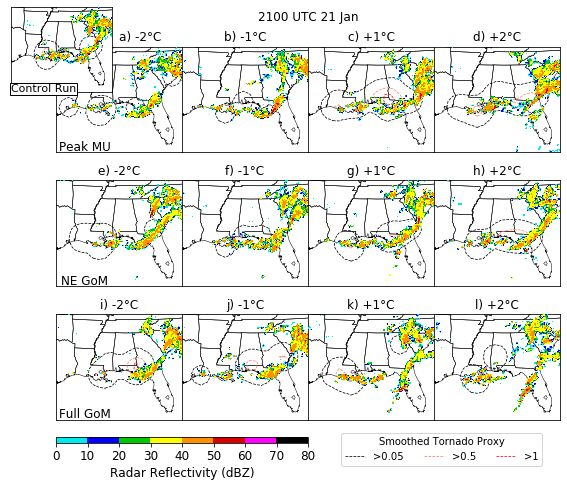

In [9]:
#########################################################################################
#########################################################################################
#########################################################################################


level=[0.05,0.5,1,1.5,2]

timeint=0

xmin, ymin = bm(-96, 24)
xmax, ymax = bm(-78, 37)

fig = plt.figure(figsize=(7.,6.))

fig.suptitle(f'2100 UTC 21 Jan', x=0.5, y=1.0, fontsize=12)

a = u"\u00b0"


##############################################################################  


ax1 = fig.add_axes([0.0, 0.63, 0.25, 0.33])

ax1.set_title("a) -2"+a+"C", fontsize=12, ha='left')

ax1.text(0.225, 0.05, 'Peak MU', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
#bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 

wspd_contours = bm.contourf(x, y, to_np(dbz1_wrf_d02)[3,:,:], 
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.0)
#ax1.add_patch(patch_mu)

cn = bm.contour(x1, y1, gfilt(new_murgion_cool_2[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])


##############################################################################  


ax2 = fig.add_axes([0.25, 0.63, 0.25, 0.33])

ax2.set_title("b) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.contourf(x, y, to_np(dbz2_wrf_d02)[3,:,:], 
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.0)
#ax2.add_patch(patch_mu)

cn = bm.contour(x1, y1, gfilt(new_murgion_cool_1[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

ax2.set_xlim([xmin, xmax])
ax2.set_ylim([ymin, ymax])


##############################################################################  


ax3 = fig.add_axes([0.5, 0.63, 0.25, 0.33])

ax3.set_title("c) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.contourf(x, y, to_np(dbz3_wrf_d02)[3,:,:], 
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.0)
#ax3.add_patch(patch_mu)

cn = bm.contour(x1, y1, gfilt(new_murgion_warm_1[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

ax3.set_xlim([xmin, xmax])
ax3.set_ylim([ymin, ymax])


##############################################################################  


ax4 = fig.add_axes([0.75, 0.63, 0.25, 0.33])

ax4.set_title("d) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.contourf(x, y, to_np(dbz4_wrf_d02)[3,:,:], 
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.0)
#ax4.add_patch(patch_mu)

cn = bm.contour(x1, y1, gfilt(new_murgion_warm_2[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

ax4.set_xlim([xmin, xmax])
ax4.set_ylim([ymin, ymax])


##############################################################################  


ax5 = fig.add_axes([0., 0.32, 0.25, 0.33])

ax5.set_title("e) -2"+a+"C", fontsize=12)

ax5.text(0.225, 0.05, 'NE GoM', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
#bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 

wspd_contours = bm.contourf(x, y, to_np(dbz5_wrf_d02)[3,:,:],
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.0)
#ax5.add_patch(patch_plume)

cn = bm.contour(x1, y1, gfilt(new_gomplum_cool_2[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

ax5.set_xlim([xmin, xmax])
ax5.set_ylim([ymin, ymax])


##############################################################################  


ax6 = fig.add_axes([0.25, 0.32, 0.25, 0.33])

ax6.set_title("f) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.contourf(x, y, to_np(dbz6_wrf_d02)[3,:,:],
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.0)
#ax6.add_patch(patch_plume)

cn = bm.contour(x1, y1, gfilt(new_gomplum_cool_1[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'],linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

ax6.set_xlim([xmin, xmax])
ax6.set_ylim([ymin, ymax])


##############################################################################  


ax7 = fig.add_axes([0.5, 0.32, 0.25, 0.33])

ax7.set_title("g) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.contourf(x, y, to_np(dbz7_wrf_d02)[3,:,:],
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.0)
#ax7.add_patch(patch_plume)

cn = bm.contour(x1, y1, gfilt(new_gomplum_warm_1[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

ax7.set_xlim([xmin, xmax])
ax7.set_ylim([ymin, ymax])


##############################################################################  


ax8 = fig.add_axes([0.75, 0.32, 0.25, 0.33])

ax8.set_title("h) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.contourf(x, y, to_np(dbz8_wrf_d02)[3,:,:],
                            levels=levels,
                              cmap=cmap, vmin=0, vmax=80, zorder=30)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.0)
#ax8.add_patch(patch_plume)

cn = bm.contour(x1, y1, gfilt(new_gomplum_warm_2[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

ax8.set_xlim([xmin, xmax])
ax8.set_ylim([ymin, ymax])


##############################################################################  


ax9 = fig.add_axes([0., 0.01, 0.25, 0.33])

ax9.set_title("i) -2"+a+"C", fontsize=12)


ax9.text(0.225, 0.05, 'Full GoM', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax9.transAxes)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
#bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 
#bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)   

wspd_contours = bm.contourf(x, y, to_np(dbz9_wrf_d02)[3,:,:],
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

#ax9.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.))

cn = bm.contour(x1, y1, gfilt(new_gombasn_cool_2[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

ax9.set_xlim([xmin, xmax])
ax9.set_ylim([ymin, ymax])


##############################################################################  


ax10 = fig.add_axes([0.25, 0.01, 0.25, 0.33])

ax10.set_title("j) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
#bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.contourf(x, y, to_np(dbz10_wrf_d02)[3,:,:],
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

cn = bm.contour(x1, y1, gfilt(new_gombasn_cool_1[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

#ax10.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.))

ax10.set_xlim([xmin, xmax])
ax10.set_ylim([ymin, ymax])


##############################################################################  


ax11 = fig.add_axes([0.5, 0.01, 0.25, 0.33])

ax11.set_title("k) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
#bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.contourf(x, y, to_np(dbz11_wrf_d02)[3,:,:],
                            levels=levels,
                              cmap=cmap, vmin=0, vmax=80, zorder=30)

cn = bm.contour(x1, y1, gfilt(new_gombasn_warm_1[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

#ax11.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.))

ax11.set_xlim([xmin, xmax])
ax11.set_ylim([ymin, ymax])


##############################################################################  


ax12 = fig.add_axes([0.75, 0.01, 0.25, 0.33])

ax12.set_title("l) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
#bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.contourf(x, y, to_np(dbz12_wrf_d02)[3,:,:],
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

cn = bm.contour(x1, y1, gfilt(new_gombasn_warm_2[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

#ax12.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='r', ls='--', lw=1., alpha=1.))

ax12.set_xlim([xmin, xmax])
ax12.set_ylim([ymin, ymax])


##############################################################################  


ax13 = fig.add_axes([-0.09, 0.811, 0.2, 0.2])

ax13.text(0., 0., "Control Run", fontsize=11, zorder=40, transform=ax13.transAxes,
         bbox={'facecolor':'w', 'pad':1})

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.contourf(x, y, to_np(dbz_wrf_d02)[3,:,:],
                            levels=levels,
                            cmap=cmap, vmin=0, vmax=80, zorder=30)

cn = bm.contour(x1, y1, gfilt(new_control_orig_0[timeint,:,:],sigma=1.),
                           levels=level, 
                           colors=['k','salmon','r','darkred','darkred'], linewidths=0.75, linestyles='--',
                           vmin=0, vmax=2)

ax13.set_xlim([xmin, xmax])
ax13.set_ylim([ymin, ymax])


##############################################################################  


cbar_ax = fig.add_axes([0.0, 0.0, 0.5, 0.0125])

tickss = [0,10,20,30,40,50,60,70,80]
cbar = fig.colorbar(wspd_contours, ticks=tickss, cax=cbar_ax, orientation="horizontal", extend='both')
cbar.ax.set_xticklabels(['0','10','20','30','40','50','60','70','80'])
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Radar Reflectivity (dBZ)', fontsize=12)


##############################################################################  


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', ls='--', lw=0.75),
                Line2D([0], [0], color='salmon', ls='--', lw=0.75),
                Line2D([0], [0], color='red', ls='--', lw=0.75)]

#cbar_ax2 = fig.add_axes([0.5, 0.0, 0.5, 0.0125])
ax12.legend(custom_lines, ['>0.05', '>0.5', '>1'], ncol=3, title='Smoothed Tornado Proxy', bbox_to_anchor=(0.9, -0.075))


plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig12.png', bbox_inches='tight', pad_inches=0.075, dpi=1200)
plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig12_lowdpi.png', bbox_inches='tight', pad_inches=0.075, dpi=200)
plt.show()
plt.close()



##############################################################################  
##############################################################################  
##############################################################################  